/Users/huangzijing/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


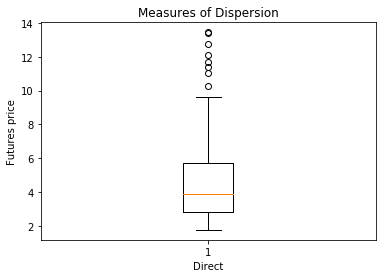

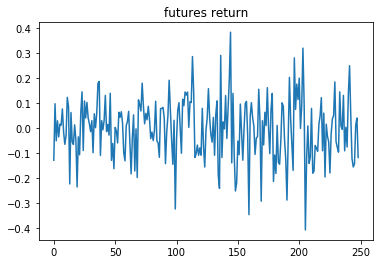

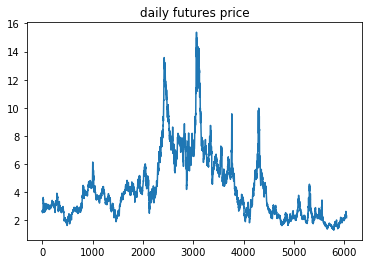

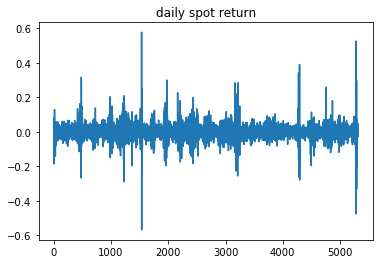

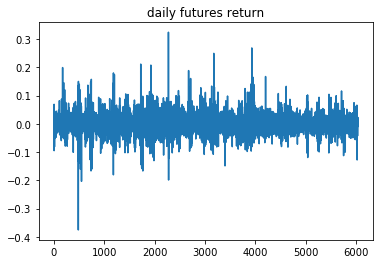


--------------------- Spot_daily.Spot -------------------
DescribeResult(nobs=5318, minmax=(1.05, 18.48), mean=4.378676194057916, variance=4.9711113561042257, skewness=1.5067872389070984, kurtosis=2.907115157608411)

--------------------- daily_spot_return -------------------
DescribeResult(nobs=5317, minmax=(-0.56817504133109242, 0.5766634490306668), mean=-7.236016129227899e-05, variance=0.0020888699798032573, skewness=0.5648869065566638, kurtosis=23.86294930268218)

--------------------- daily_futures_return -------------------
DescribeResult(nobs=6043, minmax=(-0.3757486357796872, 0.32435377704788548), mean=3.3296245174656423e-05, variance=0.0012543564170064991, skewness=0.22191495601643277, kurtosis=6.945059778283632)

--------------------- futures_daily.Futures -------------------
DescribeResult(nobs=6044, minmax=(1.3230000000000002, 15.378), mean=4.1665610522832557, variance=5.2290306202998025, skewness=1.532933941967112, kurtosis=2.798864746388529)

--------------- autocorrelat

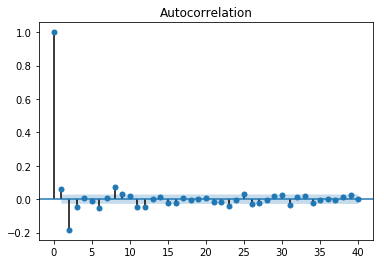

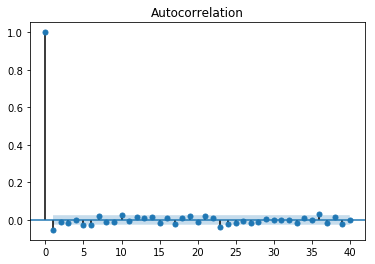

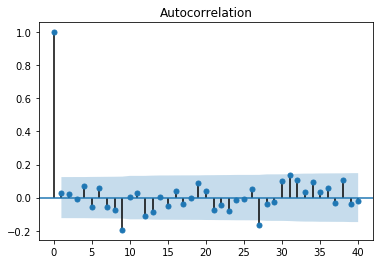

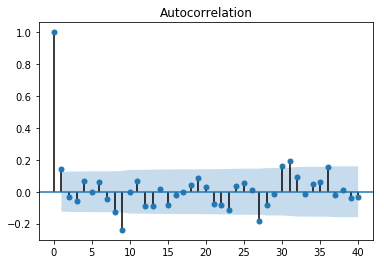


--------------- partial autocorrelation function ----------------


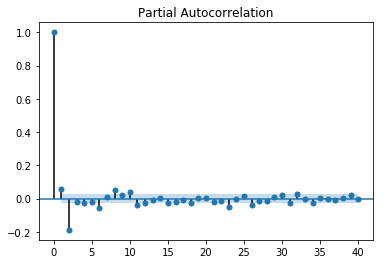

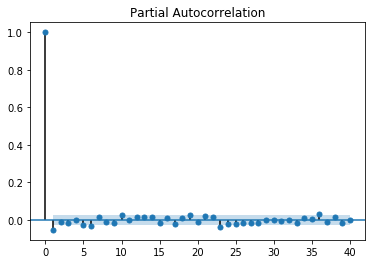

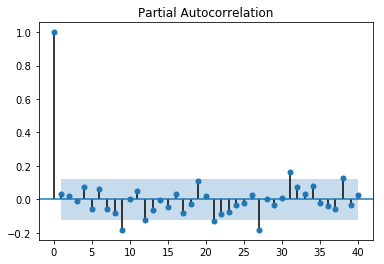

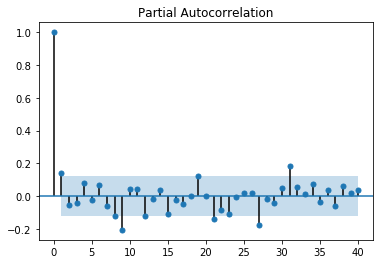


--------------- Ljung-Box test for no autocorrelation ----------------
(array([  18.59951146,  198.66054441,  209.8766546 ,  210.08780292,
        210.54908436,  223.95226165,  224.48032545,  251.78190726,
        256.73185991,  258.93037882,  271.02942405,  281.88199868,
        281.89615558,  282.91705411,  285.53231359,  288.6529249 ,
        288.84679179,  289.1360406 ,  289.13679916,  289.3567986 ,
        291.1101431 ,  292.72946271,  302.43029506,  302.45302148,
        307.98429632,  312.31732819,  314.92514308,  314.97524209,
        316.69569242,  320.81992725,  327.38202326,  328.13515937,
        329.76747783,  333.03424891,  333.05509261,  333.08087177,
        333.12723719,  334.06786297,  337.59458265,  337.66144306]), array([  1.61261871e-05,   7.26793266e-44,   3.09628077e-45,
         2.54389355e-44,   1.56989023e-43,   1.49403820e-45,
         7.38253249e-45,   7.21897581e-50,   3.77767684e-50,
         7.17636692e-50,   1.08728873e-51,   2.96263637e-53,
         1.

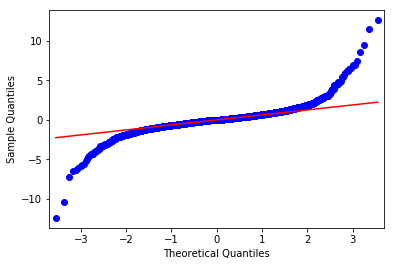

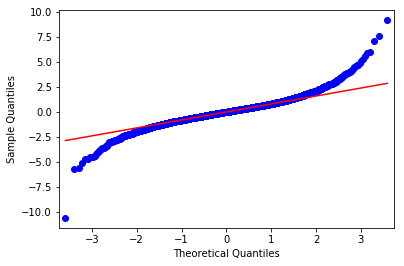

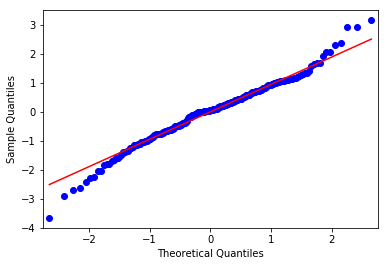

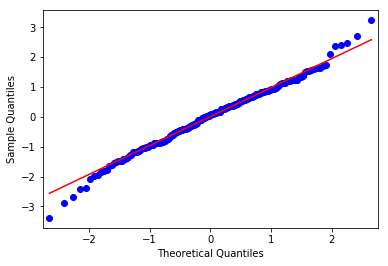

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5317
Model:                    ARMA(11, 0)   Log Likelihood                8996.978
Method:                       css-mle   S.D. of innovations              0.045
Date:                Tue, 10 Apr 2018   AIC                         -17967.956
Time:                        14:08:24   BIC                         -17882.433
Sample:                             0   HQIC                        -17938.075
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.138e-05      0.001     -0.135      0.893      -0.001       0.001
ar.L1.y        0.0631      0.014      4.606      0.000       0.036       0.090
ar.L2.y       -0.1910      0.014    -13.927      0.0

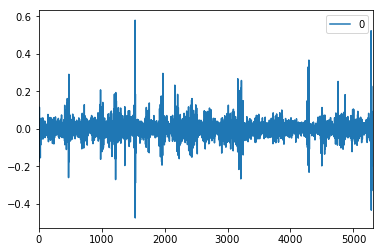

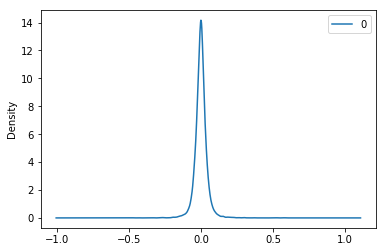

                  0
count  5.317000e+03
mean  -3.036706e-07
std    4.455883e-02
min   -4.762652e-01
25%   -1.986166e-02
50%   -2.576808e-04
75%    1.891416e-02
max    5.792931e-01


/Users/huangzijing/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-0.01124337]
predicted=-0.011243, expected=0.010050


/Users/huangzijing/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-0.00880418]
predicted=-0.008804, expected=0.000000
[-0.01352848]
predicted=-0.013528, expected=0.009950


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.preprocessing import Imputer
import math
import os
from sklearn.metrics import mean_squared_error

class BoxJenkins(object):
    
    price_monthly = None
    volume = None
    spot_daily = None
    futures_daily = None
    spot_weekly = None
    futures_weekly = None
    spot_return = None
    futures_return = None
    daily_spot_return = None
    daily_futures_return = None
    
    daily_spot_model = None
    daily_spot_model_fit = None
    daily_spot_test = None
    daily_spot_predictions = None
    daily_spot_ar_order = None
    
    
    daily_futures_model = None
    spot_model = None # monthly
    futures_model = None #monthly
   
    def readInData(self):
        # read in data and drop the row with missing value
        self.price_monthly = pd.read_csv("price.csv",header=0).dropna()
        self.volume = pd.read_csv("Natural_Gas_Volume.csv",header=0).dropna()
        self.spot_daily = pd.read_csv("Henry_Hub_Natural_Gas_Spot_Price.csv",header=0).dropna()
        self.futures_daily = pd.read_csv("Natural_Gas_Futures_Contract_1.csv",header=0).dropna()
        self.spot_weekly = pd.read_csv("Henry_Hub_Natural_Gas_Spot_Price_weekly.csv",header=0).dropna()
        self.futures_weekly = pd.read_csv("Natural_Gas_Futures_Contract_1_weekly.csv",header=0).dropna()
        
    def dataCleaning(self):
        self.price_monthly = self.price_monthly.dropna()
        self.volume = self.volume.dropna()
        self.spot_daily = self.spot_daily.dropna()
        self.futures_daily = self.futures_daily.dropna()
        self.spot_weekly = self.spot_weekly.dropna()
        self.futures_weekly = self.futures_weekly.dropna()
        
    def identification(self):
        # Measures of Dispersion 体现monthly future price的离散程度
        plt.xlabel('Direct')
        plt.ylabel('Futures price')
        plt.title('Measures of Dispersion')
        plt.boxplot(self.price_monthly['Futures Price'])
        plt.show()
        
        self.spot_return = np.diff(np.log(np.array(self.price_monthly['Spot Price'])[::-1]))
        self.futures_return = np.diff(np.log(np.array(self.price_monthly['Futures Price'])[::-1]))
        
        # 观察future return
        plt.title('futures return')
        plt.plot(self.futures_return)
        plt.show()
        
        # daily future price
        plt.title('daily futures price')
        plt.plot(self.futures_daily['Futures'])
        plt.show()
        
        # daily spot return
        self.daily_spot_return = np.diff(np.log(np.array(self.spot_daily['Spot'])[::-1]))
        plt.title('daily spot return')
        plt.plot(self.daily_spot_return)
        plt.show()
        
        # daily future return
        self.daily_futures_return = np.diff(np.log(np.array(self.futures_daily['Futures'])[::-1]))
        plt.title('daily futures return')
        plt.plot(self.daily_futures_return)
        plt.show()
        
        # show basic math inform of arrays 
        print "\n--------------------- Spot_daily.Spot -------------------"
        print stats.describe(np.array(self.spot_daily['Spot']))
        print "\n--------------------- daily_spot_return -------------------"
        print stats.describe(np.array(self.daily_spot_return))
        print "\n--------------------- daily_futures_return -------------------"
        print stats.describe(np.array(self.daily_futures_return))
        print "\n--------------------- futures_daily.Futures -------------------"
        print stats.describe(np.array(self.futures_daily['Futures']))
        
        # Apply autocorrelation function to the data set
        print "\n--------------- autocorrelation function ----------------"
        sm.graphics.tsa.plot_acf(self.daily_spot_return,lags=40)
        sm.graphics.tsa.plot_acf(self.daily_futures_return,lags=40)
        sm.graphics.tsa.plot_acf(self.spot_return,lags=40)
        sm.graphics.tsa.plot_acf(self.futures_return,lags=40)
        plt.show()
        
        # Apply partial autocorrelation function to the data set
        print "\n--------------- partial autocorrelation function ----------------"
        sm.graphics.tsa.plot_pacf(self.daily_spot_return,lags=40)
        sm.graphics.tsa.plot_pacf(self.daily_futures_return,lags=40)
        sm.graphics.tsa.plot_pacf(self.spot_return,lags=40)
        sm.graphics.tsa.plot_pacf(self.futures_return,lags=40)
        plt.show()
        
        # Ljung-Box test for no autocorrelation
        print "\n--------------- Ljung-Box test for no autocorrelation ----------------"
        print sm.stats.diagnostic.acorr_ljungbox(self.daily_spot_return)
        print sm.stats.diagnostic.acorr_ljungbox(self.daily_futures_return)
        print sm.stats.diagnostic.acorr_ljungbox(self.spot_return)
        print sm.stats.diagnostic.acorr_ljungbox(self.futures_return)

        # Augmented Dickey-Fuller unit root test
        print "\n--------------- Augmented Dickey-Fuller unit root test ----------------"
        print sm.tsa.stattools.adfuller(self.daily_spot_return)
        print sm.tsa.stattools.adfuller(self.daily_futures_return)
        print sm.tsa.stattools.adfuller(self.spot_return)
        print sm.tsa.stattools.adfuller(self.futures_return)
        
        # See whether it is Normal distribution
        print "\n--------------- Normal distribution ----------------"
        sm.qqplot(self.daily_spot_return, line='q',  fit=True)
        sm.qqplot(self.daily_futures_return, line='q',  fit=True)
        sm.qqplot(self.spot_return, line='q',  fit=True)
        sm.qqplot(self.futures_return, line='q',  fit=True)
        plt.show()
        
    def modelInit(self):
        # daily_spot_model
        daily_spot_ar = AR(self.daily_spot_return)
        self.daily_spot_ar_order = daily_spot_ar.select_order(maxlag=24, ic='aic')
        self.daily_spot_model = ARIMA(self.daily_spot_return, order=(self.daily_spot_ar_order,0,0))
        
    def modelTraining(self):
        # daily_spot_model
        self.daily_spot_model_fit = self.daily_spot_model.fit(disp=0)
        print(self.daily_spot_model_fit.summary())
        # plot residual errors
        daily_spot_model_residuals = pd.DataFrame(self.daily_spot_model_fit.resid)
        daily_spot_model_residuals.plot()
        plt.show()
        daily_spot_model_residuals.plot(kind='kde')
        plt.show()
        print(daily_spot_model_residuals.describe())
        
        # Todo: daily_futures_return, futures_return, spot_return. 
        
    def modelForecast(self):
        # daily_spot_model
        daily_spot_X = self.daily_spot_return[0:100]
        daily_spot_size = int(len(daily_spot_X) * 0.66)
        daily_spot_train, self.daily_spot_test = daily_spot_X[0:daily_spot_size], daily_spot_X[daily_spot_size:len(daily_spot_X)]
        daily_spot_history = [x for x in daily_spot_train]
        self.daily_spot_predictions = list()
        for t in range(len(self.daily_spot_test)):
            model = ARIMA(daily_spot_history, order=(self.daily_spot_ar_order,0,0))
            model_fit = model.fit(disp=0)
            daily_spot_output = model_fit.forecast()
#             daily_spot_output = self.daily_spot_model_fit.forecast()
            daily_spot_yhat = daily_spot_output[0]
            print daily_spot_yhat
            self.daily_spot_predictions.append(daily_spot_yhat)
            daily_spot_obs = self.daily_spot_test[t]
            daily_spot_history.append(daily_spot_obs)
            print('predicted=%f, expected=%f' % (daily_spot_yhat, daily_spot_obs))
#         daily_spot_error = mean_squared_error(daily_spot_test, daily_spot_predictions)
#         print('Test MSE: %.3f' % daily_spot_error)
#         # plot
#         plt.plot(daily_spot_test)
#         plt.plot(daily_spot_predictions, color='red')
#         plt.show()
        
        # Todo: daily_futures_return, futures_return, spot_return. 
        
    def modelPerformance(self):
        # daily_spot_model
        daily_spot_error = mean_squared_error(self.daily_spot_test, self.daily_spot_predictions)
        print('Test MSE: %.3f' % daily_spot_error)
        # plot
        plt.plot(self.daily_spot_test)
        plt.plot(self.daily_spot_predictions, color='red')
        plt.show()
        
        # Todo: daily_futures_return, futures_return, spot_return. 
    
bj = BoxJenkins()
bj.readInData()
bj.dataCleaning()
bj.identification()
bj.modelInit()
bj.modelTraining()
bj.modelForecast()
bj.modelPerformance()
        
    